<h1>Meu Caderno de Estudos</h1>
<h2>Gustavo Camerino</h2>

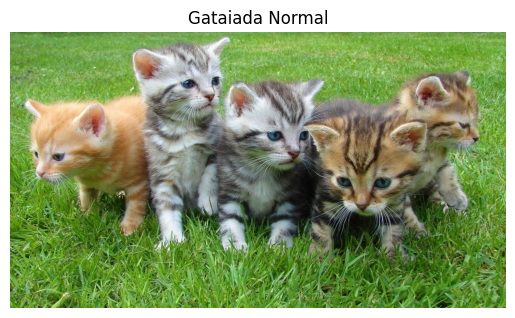

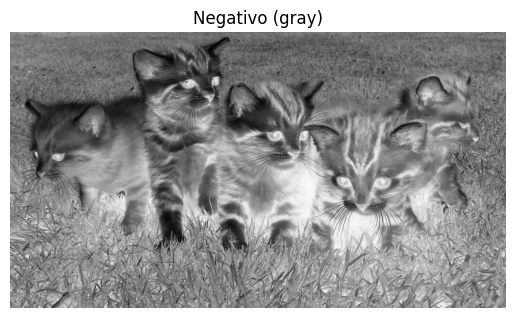

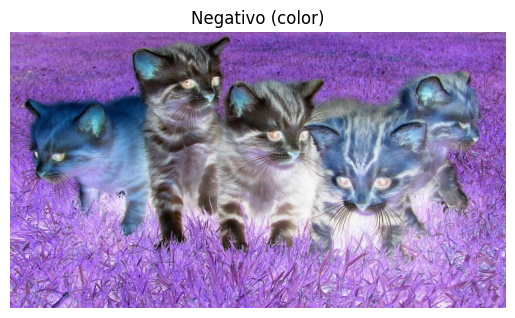

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/home/camerino/Área de Trabalho/Estudos/7-Semestre/Introdução ao Processamento de Imagens/Aprender/gataiada.jpeg')                     # BGR [0..255]
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

neg_gray = 255 - gray
neg_bgr  = 255 - img


plt.figure(); plt.title('Gataiada Normal'); plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.figure(); plt.title('Negativo (gray)'); plt.imshow(neg_gray, cmap='gray'); plt.axis('off')
plt.figure(); plt.title('Negativo (color)'); plt.imshow(cv.cvtColor(neg_bgr, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.show()



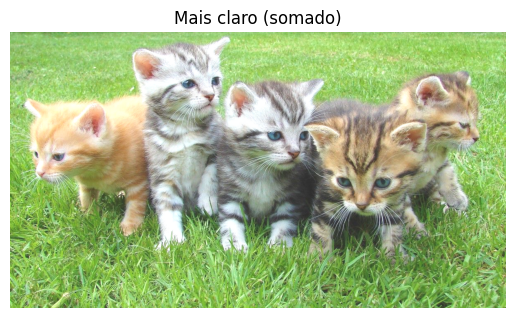

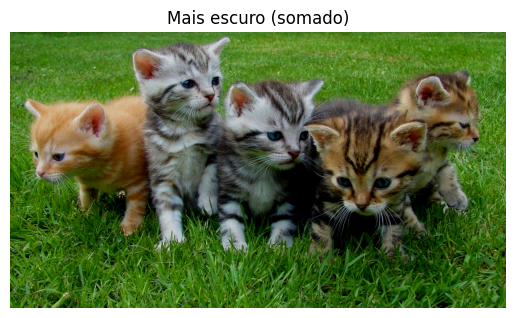

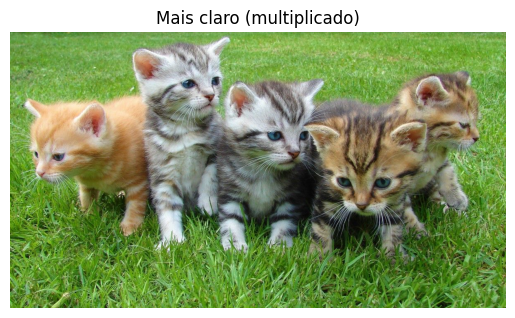

In [2]:
def add_brightness(img_bgr, c):
    out = img_bgr.astype(np.int16) + int(c)
    return np.clip(out, 0, 255).astype(np.uint8)

def mul_brightness(img_bgr, c):
    out = img_bgr.astype(np.float32) * float(c)
    return np.clip(out, 0, 255).astype(np.uint8)

# RGB direto (pode deslocar cor se usar soma):
brighter = add_brightness(img, +40)
darker   = add_brightness(img, -40)

brighter_mul = mul_brightness(img, 1)

# Preservando cor (atuar na "intensidade"): usar HSV (V) ou YCrCb (Y):
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV).astype(np.float32)
hsv[...,2] = np.clip(hsv[...,2] * 1.2, 0, 255)   # 20% mais brilho no V
bright_hsv = cv.cvtColor(hsv.astype(np.uint8), cv.COLOR_HSV2BGR)

plt.figure(); plt.title('Mais claro (somado)'); plt.imshow(cv.cvtColor(brighter, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.figure(); plt.title('Mais escuro (somado)'); plt.imshow(cv.cvtColor(darker, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.figure(); plt.title('Mais claro (multiplicado)'); plt.imshow(cv.cvtColor(brighter_mul, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(1199.5), np.float64(666.5), np.float64(-0.5))

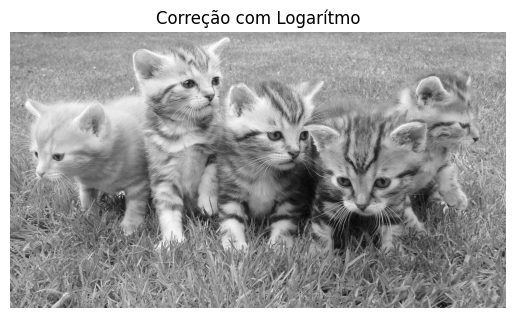

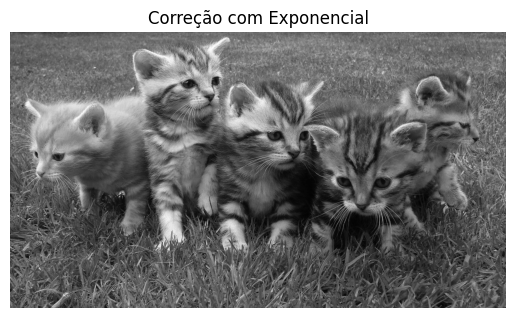

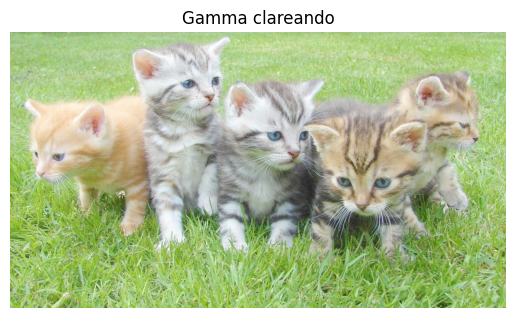

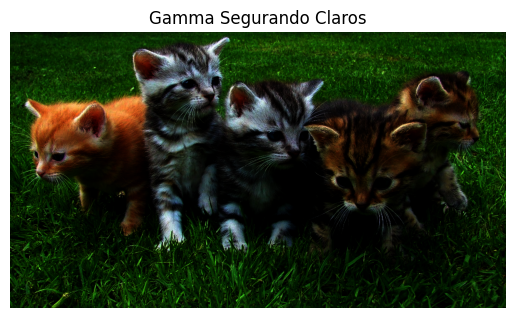

In [28]:
def to_float01(img):
    return img.astype(np.float32) / 255.0

def to_uint8(img01):
    return np.clip(img01 * 255.0, 0, 255).astype(np.uint8)

def log_correction(gray_u8):
    g = to_float01(gray_u8)
    s = np.log1p(g) / np.log(2.0)      # base 2 só pra ter escala; normaliza depois
    s = s / s.max()                    # reescala para [0,1]
    return to_uint8(s)

def exp_correction(gray_u8):
    g = to_float01(gray_u8)
    s = np.expm1(g)                    # exp(g)-1
    s = s / s.max()
    return to_uint8(s)

def gamma_correction(img_u8, gamma):
    g = to_float01(img_u8)
    s = np.power(g, gamma)
    return to_uint8(s)

log_gray  = log_correction(gray)
exp_gray  = exp_correction(gray)
gamma07   = gamma_correction(img, 0.5)  # clareia
gamma18   = gamma_correction(img, 4)  # segura claros


plt.figure(); plt.title('Correção com Logarítmo'); plt.imshow(cv.cvtColor(log_gray, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.figure(); plt.title('Correção com Exponencial'); plt.imshow(cv.cvtColor(exp_gray, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.figure(); plt.title('Gamma clareando'); plt.imshow(cv.cvtColor(gamma07, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.figure(); plt.title('Gamma Segurando Claros'); plt.imshow(cv.cvtColor(gamma18, cv.COLOR_BGR2RGB)); plt.axis('off')
